In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metrics = pd.read_csv("train_metrics.csv", index_col=0)
metrics

,step,high_card,pair,two_pair,three_of_a_kind,straight,flush,full_house,last_hand_score,final_round
0,8,0,1,3,2,0,1,1,138,1
1,16,0,3,5,2,2,2,2,56,1
2,24,0,6,7,2,3,3,3,56,1
3,32,0,10,7,2,5,5,3,58,1
4,39,1,12,8,2,8,5,3,101,1
...,...,...,...,...,...,...,...,...,...,...
1105,5174,372,1642,1765,283,522,308,282,59,1
1106,5179,372,1647,1765,283,522,308,282,55,1
1107,5179,372,1647,1765,283,522,308,282,55,1
1108,5186,372,1649,1767,284,523,309,282,62,1


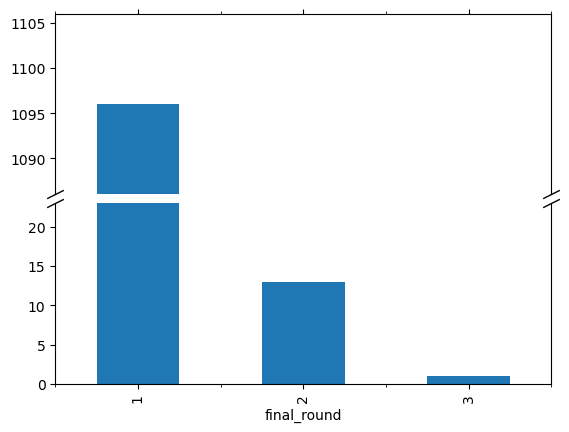

In [25]:
# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

# plot the same data on both Axes
data.plot(kind='bar', ax=ax1)
data.plot(kind='bar', ax=ax2)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(data[1] - 10, data[1] + 10)  # outliers only
ax2.set_ylim(0, data[2] + 10)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the Axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the Axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()
fig.savefig("round_hist.png")

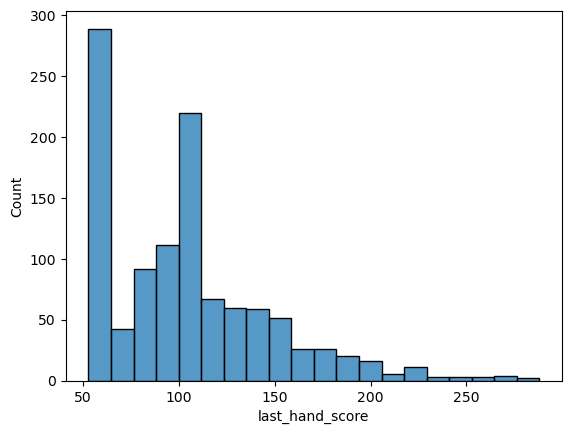

In [4]:
sns.histplot(metrics.last_hand_score)
plt.savefig("last_hand_score_hist.png")

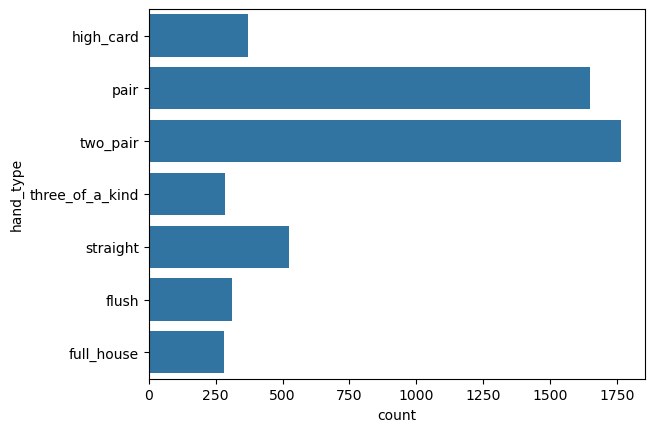

In [5]:
unpivoted = pd.melt(
    metrics.iloc[-1:],
    id_vars=['step'],
    value_vars=['high_card', 'pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house'],
    var_name='hand_type',
    value_name='count')
sns.barplot(unpivoted, y="hand_type", x="count")
plt.savefig("hand_types_bar.png")